# about data 
Context
This data set contains two class of images Cats and Dogs. This can be best utilized in a binary classification problem set in computer vision.

# import libaries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow import keras as k
import tensorflow as tf
import plotly.express as px
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

# Show random photos

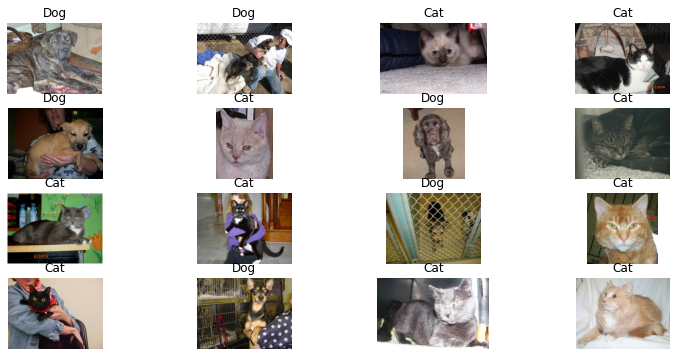

In [2]:
fig=plt.figure(figsize=(13, 6))
# Define row and cols in the figure
rows, cols = 4, 4
nm=list(plt.cm.datad.keys())
arr=np.random.randint(0,10000,(rows*cols,))
c=np.random.choice(['Cat','Dog'],(rows*cols,))
# Display first four images
i=0
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.title(c[i])
  plt.imshow(plt.imread(f'C:/Users/josem/OneDrive/Documents/GitHub/IA-lab10/PetImages/{c[i]}/{arr[i]}.jpg'))
  i+=1 
  plt.axis('off')

plt.show()

# Visualize Data


In [3]:
class_names = ['Cat', 'Dog'] 

n_dogs = len(os.listdir('C:/Users/josem/OneDrive/Documents/GitHub/IA-lab10/PetImages/Dog'))
n_cats = len(os.listdir('C:/Users/josem/OneDrive/Documents/GitHub/IA-lab10/PetImages/Cat'))
n_images = [n_cats, n_dogs]
px.pie(names=class_names, values=n_images)

# Read images 

24946
1
0
0
0
0
0
1
1
0
1


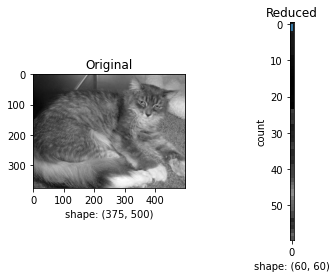

In [4]:

DIRECTORY = 'C:/Users/josem/OneDrive/Documents/GitHub/IA-lab10/PetImages/'
CATAGORY = ['Cat', 'Dog']
IMG_SIZE = 60
arr = cv2.imread(os.path.join(DIRECTORY,CATAGORY[0],'11590.jpg'), cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(arr, cmap='gray')
plt.title('Original')
plt.xlabel('shape: {}'.format(arr.shape))
plt.subplot(1,2,2)

arr = cv2.resize(arr, (IMG_SIZE,IMG_SIZE))
plt.imshow(arr, cmap='gray')
plt.title('Reduced')
plt.xlabel('shape: {}'.format(arr.shape))
training_data=[]
class_list =[]

# there are some broken imgs(corrupted)
# we will over look them as we encounter them through the try except block
def create_training_data():
    for category in CATAGORY:
        path = os.path.join(DIRECTORY,category)
        class_num = CATAGORY.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([img_array, class_num])
                class_list.append(class_num)
            except Exception as e:
                pass
            
create_training_data()
print(len(training_data))
sns.countplot(pd.Series(class_list).value_counts())
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)

    # (number of images, height, width, num of channels)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

# normalising the data


# Split the data 

In [5]:
X_train, X_test ,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=88)

# Model

In [6]:
model=Sequential([k.layers.BatchNormalization(),k.layers.Conv2D(18,(3,3),activation='relu')])
model.add(k.layers.BatchNormalization())
model.add(Dropout(0.25))

model.add(k.layers.Conv2D(32,(3,3),activation='relu'))
model.add(k.layers.BatchNormalization())

model.add(k.layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(k.layers.Conv2D(64,(3,3),activation='relu'))
model.add(k.layers.BatchNormalization())

model.add(k.layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(k.layers.Conv2D(128,(3,3),activation='relu'))

model.add(k.layers.BatchNormalization())
model.add(k.layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(k.layers.Conv2D(256,(3,3),activation='relu'))
model.add(k.layers.BatchNormalization())
model.add(k.layers.MaxPooling2D())
model.add(Dropout(0.25))

model.add(k.layers.Flatten())
model.add(k.layers.Dense(256,activation='elu',kernel_initializer='he_normal', kernel_regularizer=k.regularizers.L2()))
model.add(k.layers.BatchNormalization())
model.add(Dropout(0.25))

model.add(k.layers.Dense(512,activation='elu',kernel_initializer='he_normal',kernel_regularizer=k.regularizers.L2()))
model.add(k.layers.BatchNormalization())
model.add(Dropout(0.25))

model.add(k.layers.Dense(1,activation='sigmoid'))
model.compile(loss=k.losses.BinaryCrossentropy(from_logits=True),optimizer='nadam',metrics=['accuracy'])

In [7]:
hist=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=.1,callbacks=k.callbacks.EarlyStopping(patience=10,restore_best_weights=True))

Epoch 1/50


C:\Users\josem\AppData\Roaming\Python\Python310\site-packages\keras\backend.py:5676: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?



562/562 [==============================] - 200s 343ms/step - loss: 5.0778 - accuracy: 0.5761 - val_loss: 1.2979 - val_accuracy: 0.5426
Epoch 2/50
562/562 [==============================] - 279s 497ms/step - loss: 0.7935 - accuracy: 0.6703 - val_loss: 0.6941 - val_accuracy: 0.6498
Epoch 3/50
562/562 [==============================] - 278s 494ms/step - loss: 0.5820 - accuracy: 0.7288 - val_loss: 0.6554 - val_accuracy: 0.6889
Epoch 4/50
562/562 [==============================] - 234s 416ms/step - loss: 0.5245 - accuracy: 0.7606 - val_loss: 0.4921 - val_accuracy: 0.7761
Epoch 5/50
562/562 [==============================] - 170s 302ms/step - loss: 0.4926 - accuracy: 0.7867 - val_loss: 0.4627 - val_accuracy: 0.7936
Epoch 6/50
562/562 [==============================] - 220s 392ms/step - loss: 0.4590 - accuracy: 0.8071 - val_loss: 0.4448 - val_accuracy: 0.8051
Epoch 7/50
562/562 [==============================] - 231s 410ms/step - loss: 0.4385 - accuracy: 0.8209 - val_loss: 0.4416 - val_accura

In [ ]:
model.summary()

# Test

In [ ]:
model.evaluate(X_test,y_test)

# Visualize training process

In [ ]:
plt.figure(figsize=(9,9))
plt.style.use("ggplot")
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()